In [17]:
import pandas as pd

# Loading books.csv
books_bs = pd.read_csv('downloads/books.csv')

# Counting the number of books without an original title
books_without = books_bs['original_title'].isnull().sum()

print(f"The number of books without an original title in books.csv is: {books_without}")

The number of books without an original title in books.csv is: 36


In [37]:
import pandas as pd

# Loading book_tags.csv 
book_tags_bt = pd.read_csv('downloads/book_tags.csv')

# Displaying the first few rows
print(book_tags_bt.head())

unique_books = book_tags_bt['goodreads_book_id'].dropna().unique()

# Removing corresponding records in book_tags.csv
book_tags_bt = book_tags_bt[book_tags_bt['goodreads_book_id'].isin(unique_books)]

# Displaying the first few rows of the updated dataframe
print(book_tags_bt.head())

unique_tags = book_tags_bt['tag_id'].nunique()

print(f"The number of unique tags in the dataset is: {unique_tags}")

   goodreads_book_id  tag_id  count
0                386   30574    565
1                386   19733    280
2                386   21689    182
3                386   21773     99
4                386   19742     78
   goodreads_book_id  tag_id  count
0                386   30574    565
1                386   19733    280
2                386   21689    182
3                386   21773     99
4                386   19742     78
The number of unique tags in the dataset is: 3651


In [20]:
import pandas as pd

# Loading ratings.csv
ratings_rs = pd.read_csv('downloads/ratings.csv')

# Getting the number of unique users
uni_users = ratings_rs['user_id'].nunique()

print(f"The number of unique users in the dataset ratings is: {uni_users}")

The number of unique users in the dataset ratings is: 40836


In [23]:
import pandas as pd

# Loading book_tags.csv 
book_tags_bt = pd.read_csv('downloads/book_tags.csv')

# Getting the number of unique tags
uni_tags = book_tags_bt['tag_id'].nunique()

print(f"The number of unique tags in the dataset is: {uni_tags}")

The number of unique tags in the dataset is: 3651


In [34]:
import pandas as pd

# Loading book_tags.csv 
book_tags_bt = pd.read_csv('downloads/book_tags.csv')

tag_counts = book_tags_bt['tag_id'].value_counts()

# Getting the tag_id with the highest count
most_frequent_tag = tag_counts.idxmax()

least_numerical_tag = tag_counts[tag_counts == tag_counts.max()].idxmin()

print(f"The most frequently used tag_id is: {least_numerical_tag}")

The most frequently used tag_id is: 4600


In [35]:
import pandas as pd

# Loading book_tags.csv and books.csv 
book_tags_bt = pd.read_csv('downloads/book_tags.csv')
books_bt = pd.read_csv('downloads/books.csv')

# Merging dataframes 
merged_bt = pd.merge(book_tags_bt, books_bt[['goodreads_book_id', 'title']], 
                     left_on='goodreads_book_id', right_on='goodreads_book_id', 
                     how='inner')

# Grouping by book title and counting the number of tags
book_tag = merged_bt.groupby('title')['tag_id'].count()

# Getting the book title with the most tag counts
most_tags_book_title = book_tag.idxmax()

print(f"The book with the most number of counts of tags is: {most_tags_book_title}")

The book with the most number of counts of tags is: #GIRLBOSS


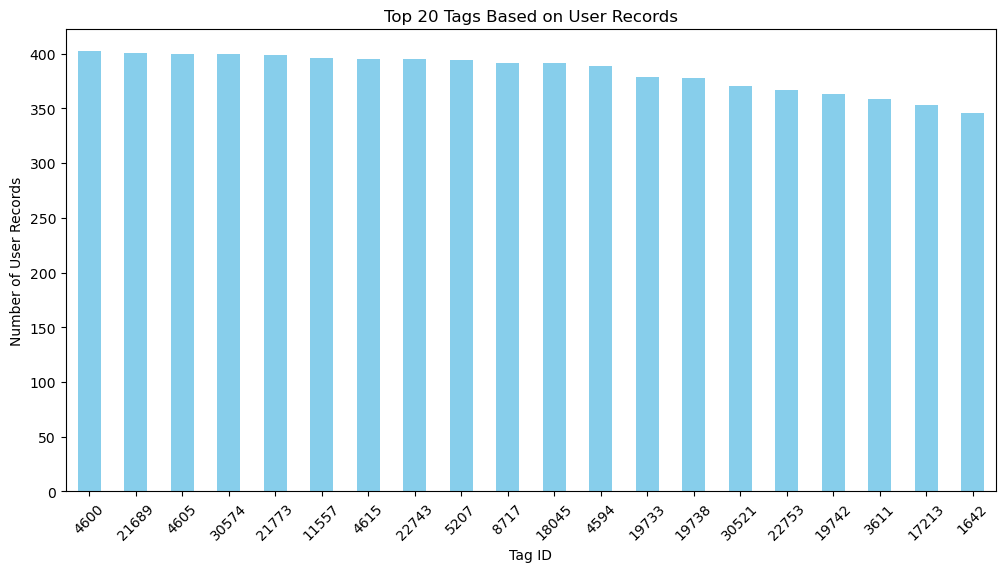

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading book_tags.csv
book_tags_bt = pd.read_csv('downloads/book_tags.csv')

# Grouping by tag_id
tag_user_counts = book_tags_bt.groupby('tag_id')['goodreads_book_id'].count()

# Getting the top 20 tags
top_20_tags = tag_user_counts.nlargest(20)

# Plotting a bar chart
plt.figure(figsize=(12, 6))
top_20_tags.plot(kind='bar', color='skyblue')
plt.title('Top 20 Tags Based on User Records')
plt.xlabel('Tag ID')
plt.ylabel('Number of User Records')
plt.xticks(rotation=45)
plt.show()